# Decision Trees

``Decision Trees (DTs)`` are a non-parametric supervised learning method used for ``classification`` and ``regression``. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

### The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), *setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem*.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. *This problem is mitigated by using decision trees within an ensemble*.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. *This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement*.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. *It is therefore recommended to balance the dataset prior to fitting with the decision tree*.

## Classification

``DecisionTreeClassifier`` is a class capable of performing multi-class classification on a dataset.

As with other classifiers, ``DecisionTreeClassifier`` takes as input two arrays: an array $X$, sparse or dense, of size ``[n_samples, n_features]`` holding the training samples, and an array Y of integer values, size ``[n_samples]``, holding the class labels for the training samples:

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

After being fitted, the model can then be used to predict the class of samples:

In [2]:
clf.predict([[1.5, 1.5]])

array([1])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [6]:
clf.predict_proba([[0, 0]])

array([[ 1.,  0.]])

``DecisionTreeClassifier`` is capable of both binary (where the labels are $[-1, 1]$) classification and multiclass (where the labels are $[0, …, K-1]$) classification.

Using the Iris dataset, we can construct a tree as follows:

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Below is an example graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output file iris.pdf:

In [9]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("iris") 

'iris.pdf'

The ``export_graphviz`` exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

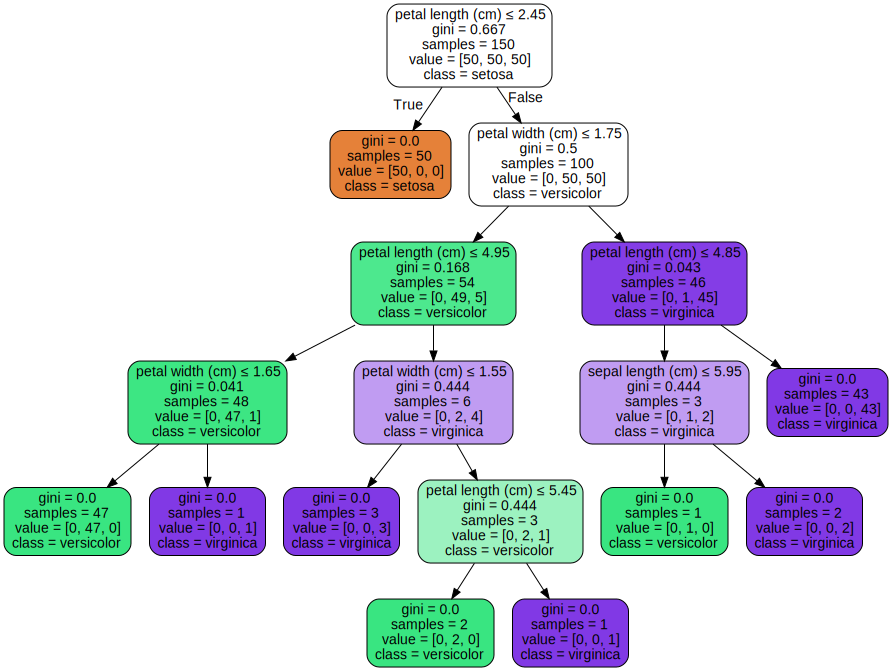

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

After being fitted, the model can then be used to predict the class of samples:

In [11]:
clf.predict(iris.data[:1, :])

array([0])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [13]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])


Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.



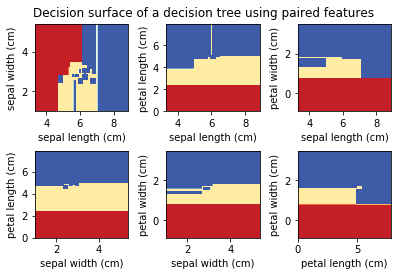

In [23]:
"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
    plt.suptitle("Decision surface of a decision tree using paired features")
    
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()
plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

##  Regression¶

Decision trees can also be applied to regression problems, using the ``DecisionTreeRegressor`` class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

In [2]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor().fit(X, y)
clf.predict([[1, 1], [3, 3]])

array([ 0.5,  2.5])


Decision Tree Regression

A 1D regression with decision tree.

The :ref:`decision trees <tree>` is
used to fit a sine curve with addition noisy observation. As a result, it
learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.



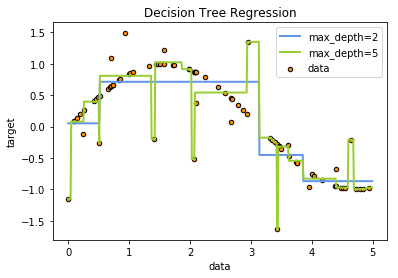

In [3]:
"""
===================================================================
Decision Tree Regression
===================================================================

A 1D regression with decision tree.

The :ref:`decision trees <tree>` is
used to fit a sine curve with addition noisy observation. As a result, it
learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.
"""
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


##  Multi-output problems¶

A multi-output problem is a supervised learning problem with several outputs to predict, that is when Y is a 2d array of size ``[n_samples, n_outputs]``.

When there is no correlation between the outputs, a very simple way to solve this kind of problem is to build n independent models, i.e. one for each output, and then to use those models to independently predict each one of the n outputs. However, because it is likely that the output values related to the same input are themselves correlated, an often better way is to build a single model capable of predicting simultaneously all n outputs. First, it requires lower training time since only a single estimator is built. Second, the generalization accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes:

- Store n output values in leaves, instead of 1;
- Use splitting criteria that compute the average reduction across all n outputs.

This module offers support for multi-output problems by implementing this strategy in both ``DecisionTreeClassifier`` and ``DecisionTreeRegressor``. If a decision tree is fit on an output array Y of size ``[n_samples, n_outputs]`` then the resulting estimator will:

- Output n_output values upon predict;
- Output a list of n_output arrays of class probabilities upon predict_proba.


Multi-output Decision Tree Regression

An example to illustrate multi-output regression with decision tree.

The :ref:`decision trees <tree>`
is used to predict simultaneously the noisy x and y observations of a circle
given a single underlying feature. As a result, it learns local linear
regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.



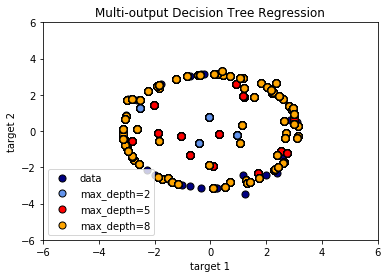

In [5]:
"""
===================================================================
Multi-output Decision Tree Regression
===================================================================

An example to illustrate multi-output regression with decision tree.

The :ref:`decision trees <tree>`
is used to predict simultaneously the noisy x and y observations of a circle
given a single underlying feature. As a result, it learns local linear
regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Creat a random dataset
rng = np.random.RandomState(1)
X = np.sort(200*rng.rand(100, 1) -100, axis=0)
y = np.array([np.pi*np.sin(X).ravel(), np.pi*np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2).fit(X, y)
regr_2 = DecisionTreeRegressor(max_depth=5).fit(X, y)
regr_3 = DecisionTreeRegressor(max_depth=8).fit(X, y)

X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 50

plt.scatter(y[:, 0], y[:, 1], c='navy',  s=s,
           edgecolor='black', label='data')
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()